In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("rainfall_monthly_total_singapore_20220425.csv")

In [3]:
def processData(data):
    
    data = data.copy()
    data["date"] = data["month"].apply(lambda x: x + "-01")
    data["date"] = data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
    data.index = data["date"]
    if data.index.is_unique:
        print("Unique daily records")
    else:
        print("Duplicate dates exist!")
    data["total_rainfall_12ma"] = data["total_rainfall"].rolling(12).mean()
    data["total_rainfall_previous_month"] = data["total_rainfall"].shift(1)
    data["total_rainfall_previous_12months"] = data["total_rainfall"].shift(12)
    
    return data

In [4]:
def correlationLags(data):
    
    correlations = []
    
    for i in range(1, 25):
        correlationValue = data.total_rainfall.corr(data.total_rainfall.shift(i))
        print(f"Correlation at lag {i}: {correlationValue}")
        correlations.append(correlationValue)
        
    minCorrelationIndex = np.argmin(correlations)
    maxCorrelationIndex = np.argmax(correlations)
    
    print(f"Strongest correlation at lag {maxCorrelationIndex+1}")
    print(f"Weakest correlation at lag {minCorrelationIndex+1}")
        
    return correlations

In [5]:
def plotMA(data):
    
    data["total_rainfall"].plot(color = "k", linestyle = "solid", figsize = (15, 7), label = "Original")
    data["total_rainfall_12ma"].plot(color = "r", linestyle = "solid", linewidth = 3, label = "12-month Moving Average")
    plt.legend(loc = "best")
    plt.title("Rainfall monthly in Singapore")
    plt.show()

Unique daily records
Correlation at lag 1: 0.17776421537790496
Correlation at lag 2: 0.04416369991776362
Correlation at lag 3: -0.06287628507836214
Correlation at lag 4: 0.021068330317584247
Correlation at lag 5: -0.08811480701737573
Correlation at lag 6: -0.03487865355728779
Correlation at lag 7: -0.013766589618239768
Correlation at lag 8: 0.05060375725692523
Correlation at lag 9: -0.07628567809430467
Correlation at lag 10: -0.028971510280509993
Correlation at lag 11: 0.09171796995521979
Correlation at lag 12: 0.23567234553927666
Correlation at lag 13: 0.060534892119217906
Correlation at lag 14: 0.008150733424852863
Correlation at lag 15: -0.12449790462671026
Correlation at lag 16: -0.06096670260966205
Correlation at lag 17: -0.138040532126578
Correlation at lag 18: -0.07400419107000446
Correlation at lag 19: -0.08548223142595651
Correlation at lag 20: 0.020003471282053494
Correlation at lag 21: -0.12008565609317037
Correlation at lag 22: 0.00793807462043776
Correlation at lag 23: 0.0

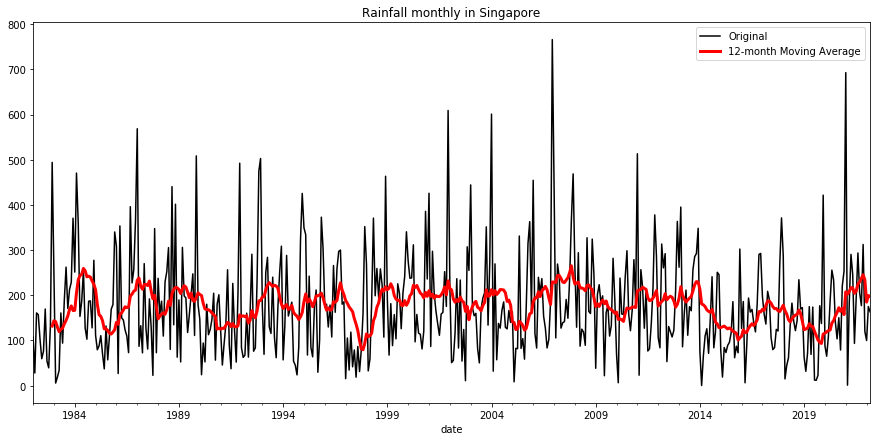

In [6]:
data = processData(data)
correlations = correlationLags(data)
plotMA(data)